In [1]:
from IPython.display import Image 
import cv2
import autoscope
import numpy as np
from math import sqrt
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
from autoscope.utils import log
import logging

log.setLevel(logging.WARNING)

In [3]:
focus_pins = [17, 22, 23, 24]
scope = autoscope.Autoscope([12, 16, 20, 21], [6, 13, 19, 26], focus_pins)

In [4]:
scope.focus.set_home()

In [23]:
scope.auto_focus(thresh=150)

In [20]:
scope.stage.forward(20, speed=2)

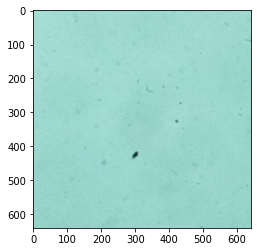

In [22]:
plt.imshow(scope.camera.get_tile())

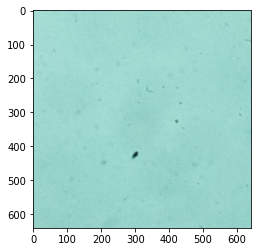

In [23]:
plt.imshow(scope.camera.get_tile())

In [8]:
scope.camera.save('scans/test.png', scope.camera.get_tile())

In [4]:
scope.auto_scan(
    name='gut_10x', 
    forward=True, 
    right=True, 
    xsquares=7, 
    ysquares=9, 
    xsteps=35, 
    ysteps=25, 
    speed=2
)

In [40]:
ysquares=3
xsquares=1
pos = [0,0]
xsteps = 10
ysteps = 10
right, forward = True,True

for y in range(ysquares):
    for x in range(xsquares):
        print(pos)
        if x+1 == xsquares:
            break
        if right:
            pos[0] += xsteps
        else:
            pos[0] -= xsteps
    if forward:
        pos[1] += ysteps
    else:
        pos[1] -= ysteps
    right = not right

[0, 0]
[0, 10]
[0, 20]


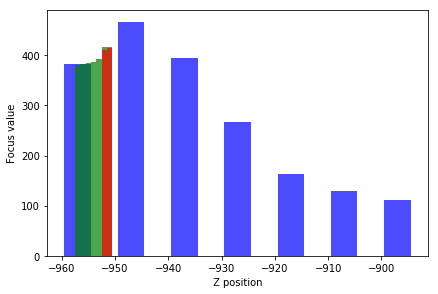

In [209]:
# create plot
fig, ax = plt.subplots()
opacity = 0.7
 
rects2 = plt.bar(fine_x1, fine_y1, 10/2,
                 alpha=opacity,
                 color='b',
                 label='fine')
 
rects2 = plt.bar(fine_x2, fine_y2, 1,
                 alpha=opacity,
                 color='g',
                 label='fine')

rects3 = plt.bar(fine_x3, fine_y3, 1,
                 alpha=opacity,
                 color='r',
                 label='fine')

plt.tight_layout()
plt.xlabel('Z position')
plt.ylabel('Focus value')
plt.show()    

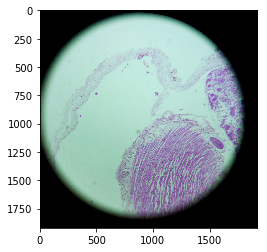

In [7]:
plt.imshow(take_photo())
plt.show()

In [53]:
# detect circles in the image
image = take_photo()
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = 10
im_bw = cv2.threshold(gray, thresh, 255, cv2.THRESH_BINARY)[1]
blured = cv2.medianBlur(gray, 15)
height,width = gray.shape

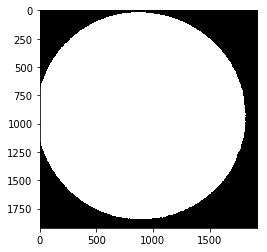

In [22]:
plt.imshow(im_bw, cmap='gray')

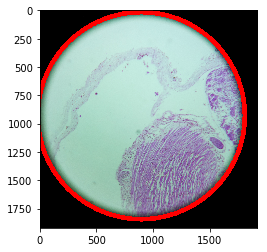

In [42]:
copped = crop_image(im_bw)
h,w = copped.shape
r = int(max([h,w])/2)
# calculate moments of binary image
M = cv2.moments(im_bw)
 
# calculate x,y coordinate of center
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
 
# put text and highlight the center
cv2.circle(image, (cX, cY), r, (255, 0, 0), 40)

plt.imshow(image)

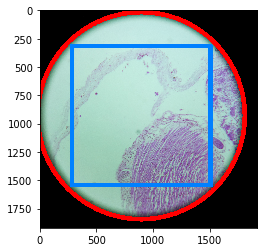

In [14]:
sq = int(((r*2/sqrt(2))/2)*.9)
cv2.rectangle(image, (cX - sq, cY - sq), (cX + sq, cY + sq), (0, 128, 255), 40)
plt.imshow(image)

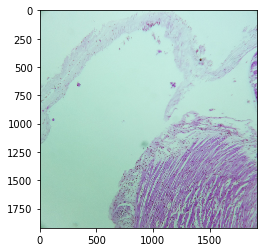

In [15]:
xpos = cX - sq 
ypos = cY - sq
plt.imshow(take_photo(zoom=(xpos/width, ypos/height, sq*2/width, sq*2/height)))

In [31]:
cv2.findNonZero(im_bw)[0]

array([[2457,   15]], dtype=int32)

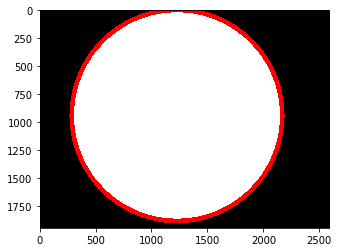

In [34]:
cX, cY

(1224, 940)

In [15]:
indcies.mean(axis=1)

AttributeError: 'tuple' object has no attribute 'mean'

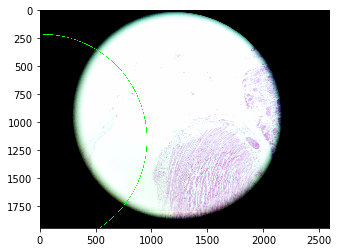

In [26]:
plt.imshow(cv2.circle(output, (int(x[0].mean()), int(y[1].mean())), int(w/2), (0, 255, 0), 4))

1883

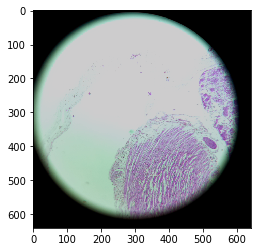

In [49]:
circles = cv2.HoughCircles(im_bw, cv2.HOUGH_GRADIENT, 1, 10000, minRadius = int((height/2)*.8))
 
# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
 
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        sq = int(((r*2/sqrt(2))/2)*.95)
        cv2.rectangle(output, (x - sq, y - sq), (x + sq, y + sq), (0, 128, 255), 4)
        xpos = x - sq 
        ypos = y - sq
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        
 
    # show the output image
plt.imshow(output)